## Load Libraries

In [2]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm
import mpl_toolkits.mplot3d.art3d as art3d

import os
import pandas as pd


matplotlib.rcParams['font.family'] = [ 'serif']
matplotlib.rcParams['agg.path.chunksize'] = 10000

### Define Local Path where `example_filaments` is located

In [3]:
import sys  
sys.path.insert(0, '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments')

import read_fils as rf

### Define path to `DisPerSE` output

In [4]:
skeleton_file_dm = '/Users/Daniel/Documents/Research Projects/Cosmic Filaments/example_filaments/del_galaxy.NDnet_s5.up.NDskl.BRK.a.NDskl'
filaments_dm = rf.ReadFilament(skeleton_file_dm)
filament_dm_dict = filaments_dm.filament_dict
print(filament_dm_dict)

header1, ANDSKEL

ndims, 3

Comments, #No comments (RB)

Bounding box, BBOX [-9.46958,-11.2398,-10.2952] [19.1849,19.2268,23.9453]

ncrit, 142
nfils, 90
Reading data fields:
CP field: persistence_ratio

CP field: persistence_nsigmas

CP field: persistence

CP field: persistence_pair

CP field: parent_index

CP field: parent_log_index

CP field: log_field_value

CP field: field_value

CP field: cell

Filament field: field_value

Filament field: orientation

Filament field: cell

Filament field: log_field_value

Filament field: type

Reading filaments took 0.01 secs.
{'ncrit': 142, 'critical_points': [{'cp_idx': 3.0, 'px': 5.24243, 'py': 0.603427, 'pz': 6.55434, 'pair_ID': 29.0, 'boundary': 0.0, 'nfil': 3, 'destID,filID': [[49, 48], [67, 66], [70, 69]], 'Field Vals': [649.3622, 5.034659, 10623.39, 29.0, 2.0, 2.0, 4.026932, 10639.77, 19.0]}, {'cp_idx': 3.0, 'px': 5.72685, 'py': -3.57222, 'pz': 3.31045, 'pair_ID': 18.0, 'boundary': 0.0, 'nfil': 4, 'destID,filID': [[23, 12], [24, 13], [24, 

Note that "CP field: " correlates to 'Field Vals'

- see how easy it is to bin for CP field: log_field_value vs field_value

### Look at what is in the dictionary

In [5]:
# recall dictionary keys give you values ("key" : "value")
filament_dm_dict.keys()

dict_keys(['ncrit', 'critical_points', 'nfils', 'filaments', 'nb_CP_fields', 'CP_fields', 'nb_fil_fields', 'fil_fields'])

In [6]:
filament_dm_dict['filaments']

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [7]:
fils = filament_dm_dict['filaments']
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [347]:
#loop to get field vals -- not at all practical 
for i in filament_dm_dict['filaments']:
    for j in i['Field Vals']:
        print(j)

4.293599
1.0
233.1
0.6328215
2.0
4.293599
1.0
459.1
0.738786
2.0
6.666538
1.0
3677.1
1.719699
2.0
98.22229
1.0
1706.1
2.414164
2.0
420.8091
1.0
1709.1
2.334426
2.0
11.16293
1.0
161.1
1.047778
2.0
11.16293
1.0
567.1
1.179229
2.0
19.05459
1.0
3643.1
3.298105
2.0
3954.093
1.0
1077.1
4.022114
2.0
17090.65
1.0
1125.0
4.022114
2.0
4.293599
1.0
233.1
0.6623298
2.0
4.897339
1.0
369.1
0.6899601
2.0
4.897339
1.0
1670.1
0.7425875
2.0
6.159156
1.0
711.1
0.817345
2.0
6.974177
1.0
4803.1
1.512984
2.0
58.1907
1.0
1225.1
3.319667
2.0
4117.198
1.0
863.0
3.319667
2.0
0.5804326
1.0
384.1
-0.2139476
2.0
0.6415988
1.0
7491.1
0.02652461
2.0
1.484359
1.0
4295.1
0.09570752
2.0
1.008729
1.0
7942.1
-0.0659027
2.0
0.7096833
1.0
3456.1
-0.1489354
2.0
0.7096833
1.0
7983.1
0.5988965
2.0
7.232254
1.0
3090.1
1.193721
2.0
24.01066
1.0
3089.1
1.193721
2.0
0.5804326
1.0
384.1
-0.2362482
2.0
0.5804326
1.0
274.1
-0.0152538
2.0
1.35054
1.0
4531.1
1.116929
2.0
24.82881
1.0
4668.1
2.180778
2.0
278.4265
1.0
3349.1
2.517208
2.

In [201]:
cpfields = filament_dm_dict['CP_fields'] 
cpfields

['persistence_ratio\n',
 'persistence_nsigmas\n',
 'persistence\n',
 'persistence_pair\n',
 'parent_index\n',
 'parent_log_index\n',
 'log_field_value\n',
 'field_value\n',
 'cell\n']

2 sigma threshold - means persistence is removing anything below 2 sigmas because they are too common / not rare enough 

In [7]:
#number of filaments
nfils = filament_dm_dict['nfils'] ; ncrit = filament_dm_dict['ncrit']
print("# of filaments: ",nfils,"\n","# of critical points :",ncrit) 

# of filaments:  90 
 # of critical points : 142


In [10]:
crit_points = filament_dm_dict['critical_points'] #Ari helped with this -- works for individual value
                                                # but not for something with multiple values 
arr = np.zeros(len(crit_points))
for i, stuff in enumerate(crit_points): 
    arr[i] = stuff['px']
arr

array([ 5.24243e+00,  5.72685e+00,  5.06727e+00, -1.91252e+00,
        3.26524e+00,  4.09658e+00, -1.82022e+00,  2.37478e+00,
        2.61960e+00, -3.94902e-01, -6.09374e+00, -2.87142e+00,
       -4.79659e+00,  2.81220e-01, -2.76555e+00, -2.81356e+00,
        7.20867e-02,  2.36955e+00, -2.87523e+00, -1.06399e+00,
       -5.06605e-02, -2.64355e-01, -1.79768e+00,  5.29703e+00,
        5.52638e+00,  3.79618e+00,  6.17912e+00,  3.49849e+00,
       -2.97616e+00, -3.23601e+00, -2.78026e+00, -2.07529e+00,
       -1.74100e+00, -2.17170e+00, -5.59007e+00, -4.82035e+00,
        4.14404e+00,  3.69371e+00, -1.97760e+00, -2.18845e+00,
        1.96194e+00,  4.00220e+00,  3.87457e+00,  8.47687e-02,
        3.61367e-01,  3.31705e-01,  2.78577e-01,  1.17721e+00,
        2.52207e+00,  5.16158e+00,  3.79036e+00,  3.13925e+00,
        4.73533e+00,  5.49637e+00, -1.55400e-01, -1.47600e-01,
       -7.91629e+00, -3.83303e+00, -6.49381e-01, -4.84411e+00,
        5.54671e+00,  5.54510e+00, -6.42787e-01,  3.199

In [9]:
filament_dm_dict['critical_points']

[{'cp_idx': 3.0,
  'px': 5.24243,
  'py': 0.603427,
  'pz': 6.55434,
  'pair_ID': 29.0,
  'boundary': 0.0,
  'nfil': 3,
  'destID,filID': [[49, 48], [67, 66], [70, 69]],
  'Field Vals': [649.3622,
   5.034659,
   10623.39,
   29.0,
   2.0,
   2.0,
   4.026932,
   10639.77,
   19.0]},
 {'cp_idx': 3.0,
  'px': 5.72685,
  'py': -3.57222,
  'pz': 3.31045,
  'pair_ID': 18.0,
  'boundary': 0.0,
  'nfil': 4,
  'destID,filID': [[23, 12], [24, 13], [24, 14], [26, 17]],
  'Field Vals': [2016.713,
   5.564442,
   3640.677,
   18.0,
   5.0,
   5.0,
   3.561398,
   3642.484,
   41.0]},
 {'cp_idx': 3.0,
  'px': 5.06727,
  'py': 0.175575,
  'pz': 5.8821,
  'pair_ID': 30.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[49, 49], [52, 53]],
  'Field Vals': [6525.978,
   6.0677,
   11149.95,
   30.0,
   12.0,
   12.0,
   4.04734,
   11151.66,
   279.0]},
 {'cp_idx': 3.0,
  'px': -1.91252,
  'py': -4.48546,
  'pz': 6.08865,
  'pair_ID': 25.0,
  'boundary': 1.0,
  'nfil': 1,
  'destID,filID': [[39, 3

In [10]:
# indexing the first element of 'critical_points' gives us the ID, coordinates, etc of the first critical point
filament_dm_dict['critical_points'][0]

{'cp_idx': 3.0,
 'px': 5.24243,
 'py': 0.603427,
 'pz': 6.55434,
 'pair_ID': 29.0,
 'boundary': 0.0,
 'nfil': 3,
 'destID,filID': [[49, 48], [67, 66], [70, 69]],
 'Field Vals': [649.3622,
  5.034659,
  10623.39,
  29.0,
  2.0,
  2.0,
  4.026932,
  10639.77,
  19.0]}

In [11]:
#Can further index by typing in the value we are looking for 
filament_dm_dict['critical_points'][0]['cp_idx']  # this tells us that our first critical point has ID 3 (node)

3.0

In [12]:
fils = filament_dm_dict['filaments']
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [13]:
#first filament
filament_dm_dict['filaments'][0] 

{'cp1_idx': 15.0,
 'cp2_idx': 12.0,
 'nsamp': 10,
 'px,py,pz': [[-2.81356, -2.00726, -1.79707],
  [-3.34829, -2.21085, -2.10106],
  [-3.55129, -2.20702, -2.52764],
  [-3.54704, -2.07235, -2.75681],
  [-3.62038, -2.03417, -2.75514],
  [-3.9371, -2.2373, -2.73826],
  [-4.38406, -2.60411, -2.52365],
  [-4.64688, -2.84577, -2.42487],
  [-4.78, -2.92492, -2.53663],
  [-4.79659, -2.93978, -2.5334]],
 'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]}

In [14]:
#if you want to access any of the information for that filament, you can index further
filament_dm_dict['filaments'][0]['Field Vals'][0] #gives you the first field value 

4.293599

Pre structuring - change original dictionary to something simpler !

In [ ]:
# Try to find critical points (value = 2) -- USE FUNCTION BELOW INSTEAD
N = len(crit_points)

saddles = []
for i in range(N):
    C = crit_points[i]['cp_idx'] 
    if C == 2:
        saddles.append(crit_points[i])

saddles

In [23]:
def dict_slice(key, key2, value):
    '''Indexes/slices a subset of a larger dictionary. 
        For use with separating critical points (since the CP id's are gven)'''
    N = len(key)

    list = []
    for i in range(N):
        C = key[i][key2]
        if C == value:
            list.append(key[i])
    return list 

In [ ]:
def dict_slice(key1,key2,value):
    '''Indexes/slices a subset of a larger dictionary. For 
        use with critical points (since the CP id's are gven)'''
    N = len(key) ; arr = np.zeros(N)

In [ ]:
## NEW #takes in key1 as value you want to slice, key2 is cp_idx, and looking for values of 3 (nodes)
voids = dict_slice(crit_points, 'cp_idx',0)
walls = dict_slice(crit_points, 'cp_idx',1)
saddles = dict_slice(crit_points, 'cp_idx',2)   #filament saddles
peaks = dict_slice(crit_points, 'cp_idx',3)     #peaks -- nodes! 
bi_points = dict_slice(crit_points, 'cp_idx',4) #bifurcation points

In [34]:
saddles[0]

{'cp_idx': 2.0,
 'px': -2.81356,
 'py': -2.00726,
 'pz': -1.79707,
 'pair_ID': 6.0,
 'boundary': 0.0,
 'nfil': 2,
 'destID,filID': [[12, 0], [6, 1]],
 'Field Vals': [958.9152,
  5.222504,
  4112.904,
  6.0,
  -1.0,
  -1.0,
  0.6328215,
  4.293599,
  233.1]}

destid, filid:

Info on the first filament: index of the CP at the other extremity of the filament, and index of the filament (see filaments table below)


In [146]:
saddles[0]['destID,filID']

[[12, 0], [6, 1]]

In [189]:
#therefore filaments with id 6 and 1 should be attached to this saddle[0]
N = len(fils)
for i in range(N):
    if fils[i]['cp2_idx'] == 6:
        print(fils) ; print(i)  # 2nd (index 1) and 11th filaments have inded 6 

[{'cp1_idx': 15.0, 'cp2_idx': 12.0, 'nsamp': 10, 'px,py,pz': [[-2.81356, -2.00726, -1.79707], [-3.34829, -2.21085, -2.10106], [-3.55129, -2.20702, -2.52764], [-3.54704, -2.07235, -2.75681], [-3.62038, -2.03417, -2.75514], [-3.9371, -2.2373, -2.73826], [-4.38406, -2.60411, -2.52365], [-4.64688, -2.84577, -2.42487], [-4.78, -2.92492, -2.53663], [-4.79659, -2.93978, -2.5334]], 'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]}, {'cp1_idx': 15.0, 'cp2_idx': 6.0, 'nsamp': 7, 'px,py,pz': [[-2.81356, -2.00726, -1.79707], [-2.42291, -1.79406, -1.743], [-2.6088, -2.04234, -0.950936], [-2.54813, -2.10565, -0.169142], [-2.14741, -1.74321, -0.0415953], [-1.84651, -1.46575, 0.0886922], [-1.82022, -1.45434, 0.119345]], 'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]}, {'cp1_idx': 16.0, 'cp2_idx': 17.0, 'nsamp': 8, 'px,py,pz': [[0.0720867, -5.67172, 2.83266], [0.823442, -5.41287, 3.5961], [0.486821, -5.25539, 4.66427], [0.720634, -5.33619, 4.65914], [1.15715, -5.39709, 4.85646], [1.86223, -5.6

In [198]:
fils[1]

{'cp1_idx': 15.0,
 'cp2_idx': 6.0,
 'nsamp': 7,
 'px,py,pz': [[-2.81356, -2.00726, -1.79707],
  [-2.42291, -1.79406, -1.743],
  [-2.6088, -2.04234, -0.950936],
  [-2.54813, -2.10565, -0.169142],
  [-2.14741, -1.74321, -0.0415953],
  [-1.84651, -1.46575, 0.0886922],
  [-1.82022, -1.45434, 0.119345]],
 'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]}

In [191]:
saddles[0] #notice pairID and saddle coordinates are first coordinates for filament 

{'cp_idx': 2.0,
 'px': -2.81356,
 'py': -2.00726,
 'pz': -1.79707,
 'pair_ID': 6.0,
 'boundary': 0.0,
 'nfil': 2,
 'destID,filID': [[12, 0], [6, 1]],
 'Field Vals': [958.9152,
  5.222504,
  4112.904,
  6.0,
  -1.0,
  -1.0,
  0.6328215,
  4.293599,
  233.1]}

- Figured out 'destID, filID' ! for first saddle: [[12,0], [6,1]] - 12 and 6 correspond to the IDs of the two filaments connected to the first saddle (specifically to the **'cp2_idx"** of both in the ***filaments*** dictionary (variable name fils)
- cp1_idx is 15.0 for both of these filaments (therefore cp1_idx so far has related to some sort of saddle ID, though probably nodes too)
- the 0 and 1 correspond to the index, as you check saddles[1] you see that it changes to 2,3

In [193]:
saddles[1]

{'cp_idx': 2.0,
 'px': 0.0720867,
 'py': -5.67172,
 'pz': 2.83266,
 'pair_ID': 32.0,
 'boundary': 0.0,
 'nfil': 2,
 'destID,filID': [[17, 2], [18, 3]],
 'Field Vals': [5.943952,
  5.054332,
  0.4827816,
  32.0,
  -1.0,
  -1.0,
  -0.2362482,
  0.5804326,
  384.1]}

- Verify that 'cp1_idx' is usually a node or saddle by plotting them (should correspond to the first px,py,pz coordinates)

In [15]:
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [28]:
crit_points

[{'cp_idx': 3.0,
  'px': 5.24243,
  'py': 0.603427,
  'pz': 6.55434,
  'pair_ID': 29.0,
  'boundary': 0.0,
  'nfil': 3,
  'destID,filID': [[49, 48], [67, 66], [70, 69]],
  'Field Vals': [649.3622,
   5.034659,
   10623.39,
   29.0,
   2.0,
   2.0,
   4.026932,
   10639.77,
   19.0]},
 {'cp_idx': 3.0,
  'px': 5.72685,
  'py': -3.57222,
  'pz': 3.31045,
  'pair_ID': 18.0,
  'boundary': 0.0,
  'nfil': 4,
  'destID,filID': [[23, 12], [24, 13], [24, 14], [26, 17]],
  'Field Vals': [2016.713,
   5.564442,
   3640.677,
   18.0,
   5.0,
   5.0,
   3.561398,
   3642.484,
   41.0]},
 {'cp_idx': 3.0,
  'px': 5.06727,
  'py': 0.175575,
  'pz': 5.8821,
  'pair_ID': 30.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[49, 49], [52, 53]],
  'Field Vals': [6525.978,
   6.0677,
   11149.95,
   30.0,
   12.0,
   12.0,
   4.04734,
   11151.66,
   279.0]},
 {'cp_idx': 3.0,
  'px': -1.91252,
  'py': -4.48546,
  'pz': 6.08865,
  'pair_ID': 25.0,
  'boundary': 1.0,
  'nfil': 1,
  'destID,filID': [[39, 3

In [13]:
fvals = crit_points[0]['destID,filID']
fvals = np.array(fvals)
print(fvals, np.shape(fvals))

[[49 48]
 [67 66]
 [70 69]] (3, 2)


In [155]:
#DON'T use thie function like this -- ask why I am doing this? 
#Ultimately I want to get all of the sliced values for a key ('Field Vals' , 'destID,filID', or 'px,py,pz')
#for EACH individual filament [i] instance, do math on them (for coordinates, to find distance) & then do the same
#for the next filament (rather than saving an array of all the values in one array- what I originally wanted to do).
#Therefore for what I am doing, it is better NOT to automate getting the values, 
#but rather to loop over them and instead automate the math being done on them 

def dict_index(key, index, *individual_index):   #uses *args optional argument
    '''Indexes either all of the values for one key, or indexes further to save only
        the ith (individual_index) of a value, if there are more (mostly for 'Field Vals'
        and 'destID,filID').
        Unlike the function dict_slice(), this function saves the output as an N dimensional array, 
        whereas dict_slice just saves a new dictionary list.'''
    N = len(key) ; shape = key[0][index]

    if np.shape(shape) == (): 
        arr = np.zeros(N) #creates 1d array that is length of first key 
    else: 
        arr = np.zeros(np.shape(shape)) #creates NxM array if values for first key come in pairs (rather than 1 value per key)

    for i in range(N): 
        arr[i] = key[i][index]

    
    return arr

In [182]:
type(crit_points)

list

In [156]:
dict_index(crit_points, 'px')

array([ 5.24243e+00,  5.72685e+00,  5.06727e+00, -1.91252e+00,
        3.26524e+00,  4.09658e+00, -1.82022e+00,  2.37478e+00,
        2.61960e+00, -3.94902e-01, -6.09374e+00, -2.87142e+00,
       -4.79659e+00,  2.81220e-01, -2.76555e+00, -2.81356e+00,
        7.20867e-02,  2.36955e+00, -2.87523e+00, -1.06399e+00,
       -5.06605e-02, -2.64355e-01, -1.79768e+00,  5.29703e+00,
        5.52638e+00,  3.79618e+00,  6.17912e+00,  3.49849e+00,
       -2.97616e+00, -3.23601e+00, -2.78026e+00, -2.07529e+00,
       -1.74100e+00, -2.17170e+00, -5.59007e+00, -4.82035e+00,
        4.14404e+00,  3.69371e+00, -1.97760e+00, -2.18845e+00,
        1.96194e+00,  4.00220e+00,  3.87457e+00,  8.47687e-02,
        3.61367e-01,  3.31705e-01,  2.78577e-01,  1.17721e+00,
        2.52207e+00,  5.16158e+00,  3.79036e+00,  3.13925e+00,
        4.73533e+00,  5.49637e+00, -1.55400e-01, -1.47600e-01,
       -7.91629e+00, -3.83303e+00, -6.49381e-01, -4.84411e+00,
        5.54671e+00,  5.54510e+00, -6.42787e-01,  3.199

In [84]:
D = crit_points[0]['px']
D = np.array(D)
if np.shape(D) == (): 
    print('yes')

yes


In [186]:
fils

[{'cp1_idx': 15.0,
  'cp2_idx': 12.0,
  'nsamp': 10,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-3.34829, -2.21085, -2.10106],
   [-3.55129, -2.20702, -2.52764],
   [-3.54704, -2.07235, -2.75681],
   [-3.62038, -2.03417, -2.75514],
   [-3.9371, -2.2373, -2.73826],
   [-4.38406, -2.60411, -2.52365],
   [-4.64688, -2.84577, -2.42487],
   [-4.78, -2.92492, -2.53663],
   [-4.79659, -2.93978, -2.5334]],
  'Field Vals': [4.293599, 1.0, 233.1, 0.6328215, 2.0]},
 {'cp1_idx': 15.0,
  'cp2_idx': 6.0,
  'nsamp': 7,
  'px,py,pz': [[-2.81356, -2.00726, -1.79707],
   [-2.42291, -1.79406, -1.743],
   [-2.6088, -2.04234, -0.950936],
   [-2.54813, -2.10565, -0.169142],
   [-2.14741, -1.74321, -0.0415953],
   [-1.84651, -1.46575, 0.0886922],
   [-1.82022, -1.45434, 0.119345]],
  'Field Vals': [4.293599, 1.0, 459.1, 0.738786, 2.0]},
 {'cp1_idx': 16.0,
  'cp2_idx': 17.0,
  'nsamp': 8,
  'px,py,pz': [[0.0720867, -5.67172, 2.83266],
   [0.823442, -5.41287, 3.5961],
   [0.486821, -5.25539, 4.66427],


In [171]:
YYY = crit_points[1]['destID,filID']
YYY

[[23, 12], [24, 13], [24, 14], [26, 17]]

In [166]:
N = len(crit_points)

ls = []
for i in range(N): 
    blah = crit_points[i]['destID,filID']
    ls.append(blah)

ls[0]

[[[49, 48], [67, 66], [70, 69]],
 [[23, 12], [24, 13], [24, 14], [26, 17]],
 [[49, 49], [52, 53]],
 [[39, 35]],
 [[17, 4], [27, 18], [63, 62]],
 [[23, 11], [42, 39]],
 [[15, 1], [22, 10]],
 [[36, 30], [84, 83]],
 [[48, 47]],
 [[21, 9], [32, 24]],
 [[34, 28], [56, 55]],
 [[18, 5], [33, 25]],
 [[15, 0], [35, 29]],
 [[46, 44], [90, 89]],
 [[30, 22]],
 [[12, 0], [6, 1]],
 [[17, 2], [18, 3]],
 [[16, 2], [4, 4], [76, 75]],
 [[16, 3], [11, 5], [38, 34], [88, 87]],
 [[20, 6], [22, 7]],
 [[19, 6], [21, 8], [40, 36]],
 [[20, 8], [9, 9], [43, 41]],
 [[19, 7], [6, 10], [33, 26]],
 [[5, 11], [1, 12]],
 [[1, 13], [1, 14]],
 [[26, 15], [27, 16]],
 [[25, 15], [1, 17], [75, 74], [89, 88]],
 [[25, 16], [4, 18], [37, 32]],
 [[29, 19], [31, 20]],
 [[28, 19], [30, 21], [71, 70]],
 [[29, 21], [14, 22], [73, 72]],
 [[28, 20], [32, 23], [55, 54]],
 [[31, 23], [9, 24], [74, 73]],
 [[11, 25], [22, 26]],
 [[35, 27], [10, 28]],
 [[34, 27], [12, 29], [59, 58]],
 [[7, 30], [37, 31]],
 [[36, 31], [27, 32], [72, 71]]

In [175]:
dict_index(fils, 'cp1_idx') # works for fils dict with cp1 keys, but not with something like field vals
dict_index(fils, 'px,py,pz') #does not work with coordinates 

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [179]:
N = len(fils)

List = []

for i in range(N): 
    blah = fils[i]['px,py,pz']
    List.append(blah)

List

[[[-2.81356, -2.00726, -1.79707],
  [-3.34829, -2.21085, -2.10106],
  [-3.55129, -2.20702, -2.52764],
  [-3.54704, -2.07235, -2.75681],
  [-3.62038, -2.03417, -2.75514],
  [-3.9371, -2.2373, -2.73826],
  [-4.38406, -2.60411, -2.52365],
  [-4.64688, -2.84577, -2.42487],
  [-4.78, -2.92492, -2.53663],
  [-4.79659, -2.93978, -2.5334]],
 [[-2.81356, -2.00726, -1.79707],
  [-2.42291, -1.79406, -1.743],
  [-2.6088, -2.04234, -0.950936],
  [-2.54813, -2.10565, -0.169142],
  [-2.14741, -1.74321, -0.0415953],
  [-1.84651, -1.46575, 0.0886922],
  [-1.82022, -1.45434, 0.119345]],
 [[0.0720867, -5.67172, 2.83266],
  [0.823442, -5.41287, 3.5961],
  [0.486821, -5.25539, 4.66427],
  [0.720634, -5.33619, 4.65914],
  [1.15715, -5.39709, 4.85646],
  [1.86223, -5.60071, 5.30492],
  [2.30481, -5.72357, 5.59572],
  [2.36955, -5.65897, 5.56633]],
 [[0.0720867, -5.67172, 2.83266],
  [-1.96428, -5.30094, 3.07536],
  [-3.00944, -4.59725, 3.04495],
  [-2.86515, -4.30749, 2.70464],
  [-2.83073, -4.10602, 2.41469

In [272]:
N = len(fils)

cp1_coordinates = np.zeros((N,3))
for i in range(N):
    cp1_coordinates[i,0] = fils[i]['px,py,pz'][0][0] 
    cp1_coordinates[i,1] = fils[i]['px,py,pz'][0][1] #first index [0] is for first set of coordinates
    cp1_coordinates[i,2] = fils[i]['px,py,pz'][0][2] # second index[0,1, and 2] are to take px,py, or pz

cp1_coordinates

array([[ -2.81356  ,  -2.00726  ,  -1.79707  ],
       [ -2.81356  ,  -2.00726  ,  -1.79707  ],
       [  0.0720867,  -5.67172  ,   2.83266  ],
       [  0.0720867,  -5.67172  ,   2.83266  ],
       [  2.36955  ,  -5.65897  ,   5.56633  ],
       [ -2.87523  ,  -3.97738  ,   2.37498  ],
       [ -1.06399  ,  -1.10514  ,   1.41526  ],
       [ -1.06399  ,  -1.10514  ,   1.41526  ],
       [ -0.0506605,   0.135131 ,   0.772572 ],
       [ -0.264355 ,   0.122917 ,  -1.14856  ],
       [ -1.79768  ,  -1.44293  ,   0.163435 ],
       [  5.29703  ,  -2.84634  ,   3.09209  ],
       [  5.29703  ,  -2.84634  ,   3.09209  ],
       [  5.52638  ,  -3.69724  ,   3.12857  ],
       [  5.52638  ,  -3.69724  ,   3.12857  ],
       [  3.79618  ,  -5.30722  ,   4.61961  ],
       [  3.79618  ,  -5.30722  ,   4.61961  ],
       [  6.17912  ,  -4.20421  ,   3.14064  ],
       [  3.49849  ,  -5.73673  ,   5.13741  ],
       [ -2.97616  ,  -0.641814 ,  -8.16974  ],
       [ -2.97616  ,  -0.641814 ,  -8.16

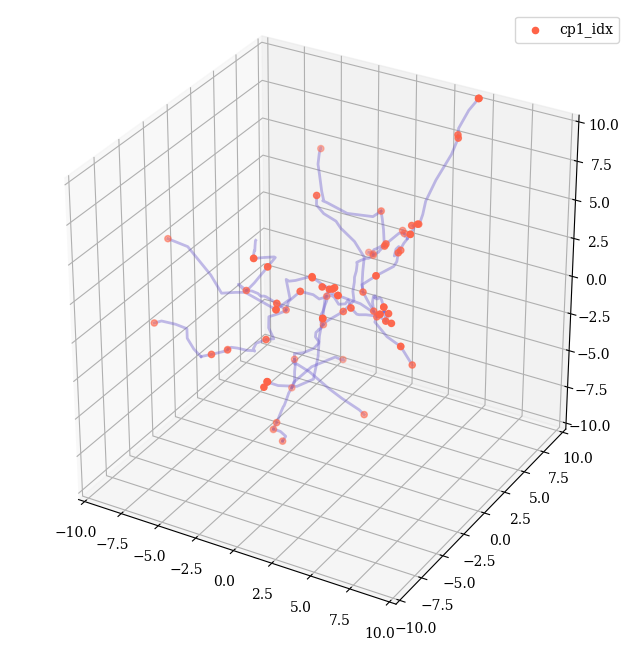

In [257]:
#plot cp1's for filaments 
fig = plt.figure(figsize=[8,8]) ; ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils):
    plot_dm_filament(fil_idx,filament_dm_dict,ax)

x = cp1_coordinates[:,0] ; y = cp1_coordinates[:,1] ; z = cp1_coordinates[:,2]
ax.scatter(x,y,z,c = 'tomato', label = 'cp1_idx')
ax.legend()

extent = 10
ax.set_xlim(-extent,extent) ; ax.set_ylim(-extent,extent) ; ax.set_zlim(-extent,extent)
plt.show()

Look at density ("value" in Disperse) or persistence 

In [65]:
# now loop through list of saddles to get ['destID, filID']
N = len(saddles)

destFil = []
for i in range(N):
    D = saddles[i]['destID,filID'] 
    destFil.append(saddles[i]['destID,filID'])

destFil 

[[[12, 0], [6, 1]],
 [[17, 2], [18, 3]],
 [[20, 6], [22, 7]],
 [[5, 11], [1, 12]],
 [[1, 13], [1, 14]],
 [[26, 15], [27, 16]],
 [[29, 19], [31, 20]],
 [[11, 25], [22, 26]],
 [[35, 27], [10, 28]],
 [[7, 30], [37, 31]],
 [[39, 33], [18, 34]],
 [[20, 36], [41, 37]],
 [[44, 40], [21, 41]],
 [[44, 45], [48, 46]],
 [[0, 48], [2, 49]],
 [[51, 50], [52, 51]],
 [[31, 54]],
 [[10, 55]],
 [[58, 56]],
 [[35, 58]],
 [[61, 59]],
 [[58, 61]],
 [[4, 62]],
 [[65, 63]],
 [[67, 67]],
 [[51, 68]],
 [[0, 69]],
 [[29, 70]],
 [[37, 71]],
 [[30, 72]],
 [[32, 73]],
 [[26, 74]],
 [[17, 75]],
 [[52, 76]],
 [[39, 77]],
 [[61, 78]]]

### Define some analysis functions

In [253]:
def plot_dm_filament(filament_idx,filament_dict,ax,colorfil='slateblue'):
    
    
    nsamp = filament_dict['filaments'][filament_idx]['nsamp']
    
    positions = filament_dict['filaments'][filament_idx]['px,py,pz']
    
    

    #plot the samples in between
    px = []
    py = []
    pz = []
    
    
    for i in range(nsamp):

        px_,py_,pz_ = positions[i][0],positions[i][1],positions[i][2]



        px.append(px_)
        py.append(py_)
        pz.append(pz_)

    
    fil_line = ax.plot3D(px,py,pz,c=colorfil,lw = '2',alpha=0.4)

In [97]:
# loop through nodes and extract pz, py, pz coordinates
N = len(nodes)

px = np.zeros(N) ; py = np.zeros(N) ; pz = np.zeros(N)

for i in range(N):
    x = nodes[i]['px'] ; px[i] = x
    y = nodes[i]['py'] ; py[i] = y
    z = nodes[i]['pz'] ; pz[i] = z

px

array([ 5.24243 ,  5.72685 ,  5.06727 , -1.91252 ,  3.26524 ,  4.09658 ,
       -1.82022 ,  2.37478 ,  2.6196  , -0.394902, -6.09374 , -2.87142 ,
       -4.79659 ,  0.28122 , -2.76555 ])

In [144]:
#or create 2d array 
N = len(nodes)

node_coordinates = np.zeros((N, 3)) #rows, columns

for i in range(N):
    px = nodes[i]['px'] ; node_coordinates[i,0] = px
    py = nodes[i]['py'] ; node_coordinates[i,1] = py
    pz = nodes[i]['pz'] ; node_coordinates[i,2] = pz

#Plot nodes 
nx = node_coordinates[:,0] # first column (px)
ny = node_coordinates[:,1]
nz = node_coordinates[:,2]

node_coordinates # px, py, pz

array([[  5.24243 ,   0.603427,   6.55434 ],
       [  5.72685 ,  -3.57222 ,   3.31045 ],
       [  5.06727 ,   0.175575,   5.8821  ],
       [ -1.91252 ,  -4.48546 ,   6.08865 ],
       [  3.26524 ,  -5.83674 ,   5.29773 ],
       [  4.09658 ,  -1.74373 ,   2.81309 ],
       [ -1.82022 ,  -1.45434 ,   0.119345],
       [  2.37478 , -10.4247  ,   1.35033 ],
       [  2.6196  ,   4.47855 ,   3.31807 ],
       [ -0.394902,   0.126573,  -1.31463 ],
       [ -6.09374 ,  -3.79654 ,  -2.9866  ],
       [ -2.87142 ,  -3.9203  ,   2.37128 ],
       [ -4.79659 ,  -2.93978 ,  -2.5334  ],
       [  0.28122 ,   6.27562 ,   1.17942 ],
       [ -2.76555 ,  -0.328572,  -9.52945 ]])

In [130]:
#array for saddle coordinates
N = len(saddles)

saddle_coordinates = np.zeros((N, 3)) #rows, columns

for i in range(N):
    px = saddles[i]['px'] ; saddle_coordinates[i,0] = px
    py = saddles[i]['py'] ; saddle_coordinates[i,1] = py
    pz = saddles[i]['pz'] ; saddle_coordinates[i,2] = pz

sx = saddle_coordinates[:,0] # first column (px)
sy = saddle_coordinates[:,1]
sz = saddle_coordinates[:,2]

In [274]:
#array for idx1 (walls?)
N = len(walls)

wall_coordinates = np.zeros((N, 3)) #rows, columns

for i in range(N):
    px = saddles[i]['px'] ; wall_coordinates[i,0] = px
    py = saddles[i]['py'] ; wall_coordinates[i,1] = py
    pz = saddles[i]['pz'] ; wall_coordinates[i,2] = pz

wx = saddle_coordinates[:,0] # first column (px)
wy = saddle_coordinates[:,1]
wz = saddle_coordinates[:,2]

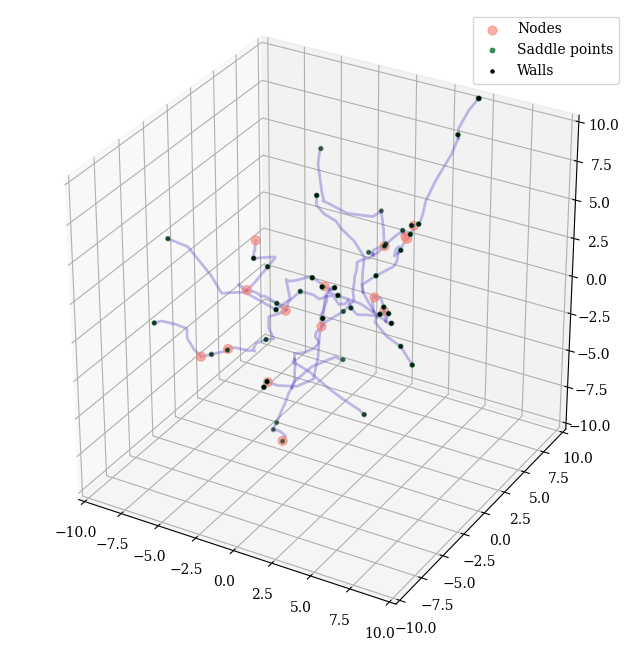

In [276]:
fig = plt.figure(figsize=[8,8])

ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils):
    plot_dm_filament(fil_idx,filament_dm_dict,ax)

ax.scatter(nx,ny,nz, c = 'salmon', s = 40, label = 'Nodes', alpha = 0.6)
ax.scatter(sx,sy,sz, c = 'seagreen', s = 10, label = 'Saddle points')
ax.scatter(wx, wy, wz, c = 'k', s = 5, label = 'Walls')

ax.legend()

extent = 10
ax.set_xlim(-extent,extent)
ax.set_ylim(-extent,extent)
ax.set_zlim(-extent,extent)
plt.show()

### Plot filaments

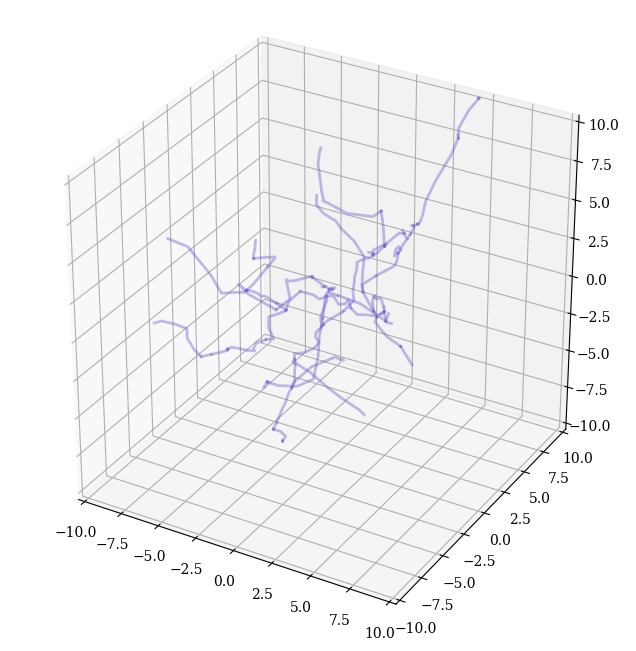

In [9]:
fig = plt.figure(figsize=[8,8])

ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([1,1,1])

for fil_idx in range(nfils):
    plot_dm_filament(fil_idx,filament_dm_dict,ax)

    
extent = 10
ax.set_xlim(-extent,extent)
ax.set_ylim(-extent,extent)
ax.set_zlim(-extent,extent)
plt.show()

In [271]:
#Look at persistence of critial poiints: 1st field val: persistence_ratio ; 2nd : persistence_nsigmas
N = len(nodes)

nodes_pr = np.zeros(N) ; nodes_nsigmas = np.zeros(N)

for i in range(N): 
    nodes_pr[i] = nodes[i]['Field Vals'][0] 
    nodes_nsigmas[i] = nodes[i]['Field Vals'][1]

np.set_printoptions(suppress=True)    
print(nodes_pr)

[  649.3622  2016.713   6525.978   2294.737   2177.62    2257.297
   958.9152 18645.99   10788.85     925.4406  1005.241    758.7361
  6578.478     -1.      8479.646 ]


In [268]:
nodes

[{'cp_idx': 3.0,
  'px': 5.24243,
  'py': 0.603427,
  'pz': 6.55434,
  'pair_ID': 29.0,
  'boundary': 0.0,
  'nfil': 3,
  'destID,filID': [[49, 48], [67, 66], [70, 69]],
  'Field Vals': [649.3622,
   5.034659,
   10623.39,
   29.0,
   2.0,
   2.0,
   4.026932,
   10639.77,
   19.0]},
 {'cp_idx': 3.0,
  'px': 5.72685,
  'py': -3.57222,
  'pz': 3.31045,
  'pair_ID': 18.0,
  'boundary': 0.0,
  'nfil': 4,
  'destID,filID': [[23, 12], [24, 13], [24, 14], [26, 17]],
  'Field Vals': [2016.713,
   5.564442,
   3640.677,
   18.0,
   5.0,
   5.0,
   3.561398,
   3642.484,
   41.0]},
 {'cp_idx': 3.0,
  'px': 5.06727,
  'py': 0.175575,
  'pz': 5.8821,
  'pair_ID': 30.0,
  'boundary': 0.0,
  'nfil': 2,
  'destID,filID': [[49, 49], [52, 53]],
  'Field Vals': [6525.978,
   6.0677,
   11149.95,
   30.0,
   12.0,
   12.0,
   4.04734,
   11151.66,
   279.0]},
 {'cp_idx': 3.0,
  'px': -1.91252,
  'py': -4.48546,
  'pz': 6.08865,
  'pair_ID': 25.0,
  'boundary': 1.0,
  'nfil': 1,
  'destID,filID': [[39, 3